# 0. Imports

In [4]:
#math
import numpy as np

#plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# 1. Aerodynamic loads
## 1.1 Aerodynamic data reading

In [5]:
#reading files
aeroload = np.loadtxt('aerodynamicloada320.dat', delimiter=',')

#getting the coordinates for the grid
N_x, N_z = 41, 81
theta_x, theta_z = [], []

#creating thetas for obtaining x and z coordinates
for i in range(0, N_x+1):
    theta_x.append(np.pi*(i-1)/N_x)
for i in range(0, N_z+1):
    theta_z.append(np.pi*(i-1)/N_z)
    
#translating into coordinates
#(0,0,0) is at the upper right corner of the aileron, if LE is facing forward
x_coords, z_coords = [], [] #[m]
l_a, C_a = 2.771, 0.547 #[m]
for i in range(0, N_x):
    x_coords.append((l_a/4) * ((1-np.cos(theta_x[i]))+(1-np.cos(theta_x[i+1]))))
for i in range(0, N_z):
    z_coords.append((-C_a/4) * ((1-np.cos(theta_z[i]))+(1-np.cos(theta_z[i+1]))))
    
#creating a grid from x_coords and z_coords for the plots
x_grid, z_grid = np.meshgrid(x_coords, z_coords)


## 1.2 Aerodynamic data plots

<IPython.core.display.Javascript object>


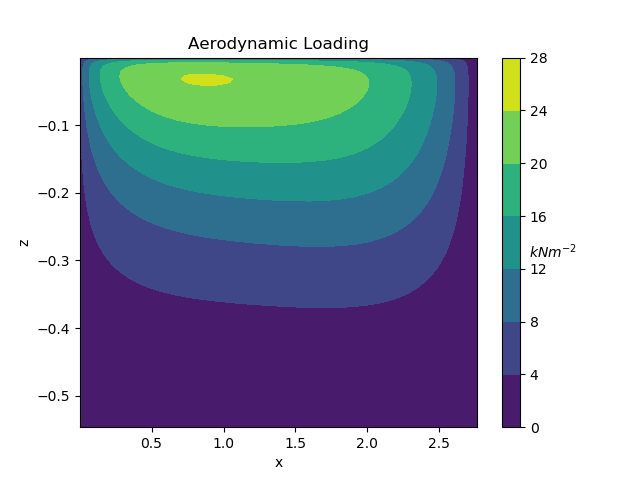

In [6]:
#2D graph for the report, possibly
#(0,0,0) is at the upper right corner of the aileron, if LE is facing forward
fig = plt.figure()
plt.contourf(x_grid,z_grid, aeroload)

plt.title('Aerodynamic Loading')
plt.xlabel('x')
plt.ylabel('z')

plt.colorbar().set_label('$kN  m^{-2}$', rotation = 0 )

plt.show()

<IPython.core.display.Javascript object>


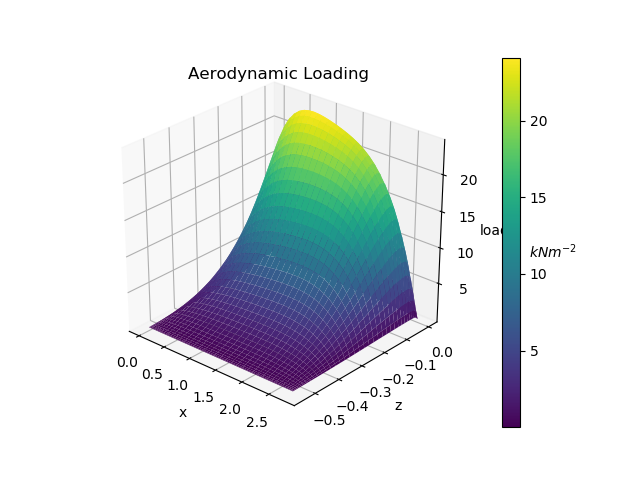

In [7]:
#interactable 3D plot to increase understanding
#(0,0,0) is at the upper right corner of the aileron, if LE is facing forward

#imagine the x-z plane as the BOTTOM of the aileron now, as the aerodynamic
#load points downwards into the x-z plane - hence it is positive in the graph

fig = plt.figure()
ax = plt.axes(projection='3d')
plot = ax.plot_surface(x_grid, z_grid, aeroload, cmap='viridis')

plt.colorbar(plot).set_label('$kN  m^{-2}$', rotation = 0 )
plt.title('Aerodynamic Loading')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('load')


plt.show()

## 1.3 Interpolation scheme

In [127]:
def aeropolator(x, z):
    """Bilinear interpolation numerical scheme
        
       semi-hardcoded for our aerodynamic load problem, do not fuck around 
       with the variable names above or the whole thing goes tits up
       
       0 < x < 2.771  [m], Nx = 41
       0 > z > -0.547 [m], Ny = 81
       
       checklist:
       [x] find closest x, y coordinates
       [x] set as x0, y0 to set up the grid
       [ ] copypaste interpolation algorithm into code
       
       [x] fix the x,y coord setter at the bounds
       []
        
       based on http://fourier.eng.hmc.edu/e176/lectures/ch7/node7.html
    """
    #first we need to find the closest x and y coordinate to set up a grid
    #currently working on interpscheme
    if x_coords[-1] >= x > x_coords[-2]:
        x1i = len(x_coords)
    elif 0 <= x <= x_coords[1]:
        x1i = 1
    else:
        x1i = x_coords.index(list(filter(lambda n: n > x, x_coords))[0])
    x0i = (x1i - 1)
    
    if z_coords[-1] <= z < z_coords[-2]:
        z1i = len(z_coords) - 1
        print('edge')
    elif 0 >= z >= z_coords[1]:
        z1i = 1
        print('zero')
    else:
        z1i = z_coords.index(list(filter(lambda n: n < z, z_coords))[0])
    z0i = (z1i - 1)
    
    print(x0i, z0i)
    